In [3]:
# image download
import xml.etree.ElementTree as ET
import requests
import os
import concurrent.futures

selected_classes = [
    'flower.npy',
    'bat.npy',
    'lightning.npy',
    'umbrella.npy',
    'dumbbell.npy',
    'flip flops.npy',
    'bush.npy',
    'nail.npy',
    'bridge.npy',
    'bread.npy',
    'leg.npy',
    'tree.npy',
    'cow.npy',
    'telephone.npy',
    'cup.npy',
    'bicycle.npy',
    'light bulb.npy',
    'crown.npy',
    'mouth.npy',
    'motorbike.npy',
    'tooth.npy',
    'school bus.npy',
    'cactus.npy',
    'spoon.npy',
    'camel.npy',
    'helicopter.npy',
    'river.npy',
    'bird.npy',
    'butterfly.npy',
    'backpack.npy',
    'table.npy',
    'hot air balloon.npy',
    'camera.npy',
    'hat.npy',
    'candle.npy',
    'bucket.npy',
    'beard.npy',
    'banana.npy',
    'eye.npy',
    'sock.npy',
    'book.npy',
    'pillow.npy',
    'foot.npy',
    'flashlight.npy',
    'crab.npy',
    'fish.npy',
    'pencil.npy',
    'leaf.npy',
    'elbow.npy',
    'donut.npy'
]


def fetch_xml(xml_url):
    response = requests.get(xml_url)
    if response.status_code != 200:
        return None
    return response.content

def parse_xml(xml_content, selected_files):
    root = ET.fromstring(xml_content)
    namespace = {'s3': 'http://doc.s3.amazonaws.com/2006-03-01'}
    base_url = "https://storage.googleapis.com/quickdraw_dataset/"

    file_urls = []
    for content in root.findall(".//s3:Contents", namespace):
        key = content.find("s3:Key", namespace).text
        file_name = os.path.basename(key)
        if file_name in selected_files:
            file_urls.append(base_url + key)
    return file_urls

def download_file(file_url, download_folder):
    file_path = os.path.join(download_folder, os.path.basename(file_url))
    if os.path.exists(file_path):
        return
    response = requests.get(file_url)
    if response.status_code == 200:
        with open(file_path, "wb") as f:
            f.write(response.content)

def download_npz_files(xml_url, download_folder, selected_files):
    if not os.path.exists(download_folder):
        os.makedirs(download_folder)

    xml_content = fetch_xml(xml_url)
    if xml_content is None:
        print("Failed to fetch XML.")
        return

    file_urls = parse_xml(xml_content, selected_files)
    print("Files to download:", file_urls)

    with concurrent.futures.ThreadPoolExecutor(max_workers=10) as executor:
        executor.map(lambda url: download_file(url, download_folder), file_urls)

xml_url = "https://storage.googleapis.com/quickdraw_dataset/"
download_folder = "image_folder"
download_npz_files(xml_url, download_folder, selected_classes)


Files to download: ['https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/backpack.npy', 'https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/banana.npy', 'https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/bat.npy', 'https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/beard.npy', 'https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/bicycle.npy', 'https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/bird.npy', 'https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/book.npy', 'https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/bread.npy', 'https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/bridge.npy', 'https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/bucket.npy', 'https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/bush.npy', 'https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/butterfly.npy', 'https://stor

In [4]:
#storokes download
import xml.etree.ElementTree as ET
import requests
import os
import concurrent.futures


selected_classes = [
    'flower.npz',
    'bat.npz',
    'lightning.npz',
    'umbrella.npz',
    'dumbbell.npz',
    'flip flops.npz',
    'bush.npz',
    'nail.npz',
    'bridge.npz',
    'bread.npz',
    'leg.npz',
    'tree.npz',
    'cow.npz',
    'telephone.npz',
    'cup.npz',
    'bicycle.npz',
    'light bulb.npz',
    'crown.npz',
    'mouth.npz',
    'motorbike.npz',
    'tooth.npz',
    'school bus.npz',
    'cactus.npz',
    'spoon.npz',
    'camel.npz',
    'helicopter.npz',
    'river.npz',
    'bird.npz',
    'butterfly.npz',
    'backpack.npz',
    'table.npz',
    'hot air balloon.npz',
    'camera.npz',
    'hat.npz',
    'candle.npz',
    'bucket.npz',
    'beard.npz',
    'banana.npz',
    'eye.npz',
    'sock.npz',
    'book.npz',
    'pillow.npz',
    'foot.npz',
    'flashlight.npz',
    'crab.npz',
    'fish.npz',
    'pencil.npz',
    'leaf.npz',
    'elbow.npz',
    'donut.npz'
]

def fetch_xml(xml_url):
    response = requests.get(xml_url)
    if response.status_code != 200:
        print(f"Failed to fetch XML: {response.status_code}")
        return None
    return response.content

def parse_xml(xml_content, selected_files):
    root = ET.fromstring(xml_content)
    namespace = {'s3': 'http://doc.s3.amazonaws.com/2006-03-01'}
    base_url = "https://storage.googleapis.com/quickdraw_dataset/"

    file_urls = []
    for content in root.findall(".//s3:Contents", namespace):
        key = content.find("s3:Key", namespace).text
        file_name = os.path.basename(key)
        if key.startswith("sketchrnn/") and file_name in selected_files:
            file_urls.append(base_url + key)
    return file_urls

def download_file(file_url, download_folder):
    file_path = os.path.join(download_folder, os.path.basename(file_url))
    if os.path.exists(file_path):
        print(f"Already exists: {file_path}")
        return

    print(f"Downloading: {file_url}")
    response = requests.get(file_url)
    if response.status_code == 200:
        with open(file_path, "wb") as f:
            f.write(response.content)
    else:
        print(f"Failed to download: {file_url}")

def download_npz_files(xml_url, download_folder, selected_files):
    if not os.path.exists(download_folder):
        os.makedirs(download_folder)

    xml_content = fetch_xml(xml_url)
    if xml_content is None:
        return

    file_urls = parse_xml(xml_content, selected_files)

    with concurrent.futures.ThreadPoolExecutor(max_workers=10) as executor:
        executor.map(lambda url: download_file(url, download_folder), file_urls)

# Run the downloader
xml_url = "https://storage.googleapis.com/quickdraw_dataset?prefix=sketchrnn/"
download_folder = "strokes_data"
download_npz_files(xml_url, download_folder, selected_classes)


Already exists: strokes_data/banana.npz
Already exists: strokes_data/backpack.npz
Already exists: strokes_data/bat.npz
Already exists: strokes_data/beard.npz
Already exists: strokes_data/bicycle.npz
Already exists: strokes_data/bird.npz
Already exists: strokes_data/book.npz
Already exists: strokes_data/bucket.npz
Already exists: strokes_data/bush.npz
Already exists: strokes_data/bridge.npz
Already exists: strokes_data/cactus.npz
Already exists: strokes_data/camel.npz
Already exists: strokes_data/camera.npz
Already exists: strokes_data/candle.npz
Already exists: strokes_data/cow.npz
Already exists: strokes_data/butterfly.npz
Already exists: strokes_data/bread.npz
Already exists: strokes_data/crab.npz
Already exists: strokes_data/cup.npz
Already exists: strokes_data/donut.npz
Already exists: strokes_data/dumbbell.npz
Already exists: strokes_data/elbow.npz
Already exists: strokes_data/eye.npz
Already exists: strokes_data/fish.npz
Already exists: strokes_data/flashlight.npz
Already exists:

In [5]:
import os
import numpy as np
from sklearn.utils import shuffle
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout,
    LSTM, Bidirectional, Concatenate, LayerNormalization,
    MultiHeadAttention, GlobalAveragePooling1D
)
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import tensorflow as tf

# Constants
MAX_SEQ_LEN = 130
STROKE_FEATURES = 3
IMG_HEIGHT, IMG_WIDTH = 28, 28
IMG_CHANNELS = 1
NUM_CLASSES = None
SAMPLES_PER_CLASS = 10_000
DATA_DIR_STROKES = 'strokes_data'
DATA_DIR_IMAGES = 'image_folder'
VALIDATION_SPLIT = 0.1
BATCH_SIZE = 128
EPOCHS = 50


2025-06-04 09:04:51.311064: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749027891.533077      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749027891.599216      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [6]:
def preprocess_stroke(stroke, max_len=MAX_SEQ_LEN):
    stroke = stroke.astype(np.float32)
    stroke[:, 0] = np.cumsum(stroke[:, 0])
    stroke[:, 1] = np.cumsum(stroke[:, 1])
    stroke[:, 0] -= stroke[:, 0].mean()
    stroke[:, 1] -= stroke[:, 1].mean()
    if len(stroke) > max_len:
        return stroke[:max_len]
    pad = np.zeros((max_len - len(stroke), STROKE_FEATURES), dtype=np.float32)
    return np.vstack([stroke, pad])


In [7]:
def load_hybrid_data(N=SAMPLES_PER_CLASS):
    img_files = sorted(f for f in os.listdir(DATA_DIR_IMAGES) if f.endswith('.npy'))
    stroke_files = sorted(f for f in os.listdir(DATA_DIR_STROKES) if f.endswith('.npz'))
    common_names = sorted(set(os.path.splitext(f)[0] for f in img_files) & 
                          set(os.path.splitext(f)[0] for f in stroke_files))[:NUM_CLASSES]

    X_img_list, X_str_list, y_list = [], [], []

    for idx, cls in enumerate(common_names):
        # Load and normalize images
        img_arr = np.load(os.path.join(DATA_DIR_IMAGES, f"{cls}.npy"),
                          allow_pickle=True, encoding='latin1')[:N]
        img_arr = img_arr.reshape(-1, IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS).astype('float32') / 255.
        X_img_list.append(img_arr)

        # Load and preprocess strokes
        data = np.load(os.path.join(DATA_DIR_STROKES, f"{cls}.npz"),
                       allow_pickle=True, encoding='latin1')
        strokes = data['train'][:N]
        proc_strokes = np.stack([preprocess_stroke(s) for s in strokes], axis=0)
        X_str_list.append(proc_strokes)

        y_list.append(np.full((N,), idx, dtype=np.int32))

    X_img = np.concatenate(X_img_list, axis=0)
    X_str = np.concatenate(X_str_list, axis=0)
    y = np.concatenate(y_list, axis=0)

    X_img, X_str, y = shuffle(X_img, X_str, y, random_state=42)
    y_cat = to_categorical(y, num_classes=len(common_names))

    return (X_str, X_img), y_cat


In [8]:
def build_asymmetric_hybrid_model(num_classes):
    # Stroke Input Branch (LSTM ➝ Attention)
    inp_str = Input(shape=(MAX_SEQ_LEN, STROKE_FEATURES), name='stroke_input')
    x = Bidirectional(LSTM(128, return_sequences=True))(inp_str)
    x = Bidirectional(LSTM(64, return_sequences=True))(x)
    x = LayerNormalization(epsilon=1e-6)(x)
    x = MultiHeadAttention(num_heads=4, key_dim=64)(x, x)
    x = GlobalAveragePooling1D()(x)
    x = Dense(64, activation='relu')(x)

    # Image Input Branch (Conv ➝ Attention)
    inp_img = Input(shape=(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), name='image_input')
    y = Conv2D(32, 3, activation='relu', padding='same')(inp_img)
    y = MaxPooling2D()(y)
    y = Conv2D(64, 3, activation='relu', padding='same')(y)
    y = MaxPooling2D()(y)

    # Flatten for Transformer
    y_reshaped = tf.keras.layers.Reshape((-1, 64))(y)
    y = LayerNormalization(epsilon=1e-6)(y_reshaped)
    y = MultiHeadAttention(num_heads=4, key_dim=64)(y, y)
    y = GlobalAveragePooling1D()(y)
    y = Dense(128, activation='relu')(y)

    # Merge Branches
    merged = Concatenate()([x, y])
    merged = Dropout(0.5)(merged)
    merged = Dense(128, activation='relu')(merged)
    out = Dense(num_classes, activation='softmax')(merged)

    return Model(inputs=[inp_str, inp_img], outputs=out, name='Asymmetric_Hybrid_Model')


In [9]:
# Load data
(X_str, X_img), y = load_hybrid_data(N=SAMPLES_PER_CLASS)
NUM_CLASSES = y.shape[1]
split_idx = int((1 - VALIDATION_SPLIT) * X_str.shape[0])

X_str_train, X_str_val = X_str[:split_idx], X_str[split_idx:]
X_img_train, X_img_val = X_img[:split_idx], X_img[split_idx:]
y_train, y_val = y[:split_idx], y[split_idx:]

# Build and compile model
model = build_asymmetric_hybrid_model(num_classes=NUM_CLASSES)
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


I0000 00:00:1749027948.550206      35 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1749027948.550840      35 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Model: "Asymmetric_Hybrid_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ image_input (InputLayer)  │ (None, 28, 28, 1)      │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 28, 28, 32)     │            320 │ image_input[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 14, 14, 32)     │              0 │ conv2d[0][0]           │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stroke_input (InputLayer) │ (None, 130, 3)         │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 14, 14, 64)     │         18,496 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bidirectional             │ (None, 130, 256)       │        135,168 │ stroke_input[0][0]     │
│ (Bidirectional)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_1           │ (None, 7, 7, 64)       │              0 │ conv2d_1[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bidirectional_1           │ (None, 130, 128)       │        164,352 │ bidirectional[0][0]    │
│ (Bidirectional)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ reshape (Reshape)         │ (None, 49, 64)         │              0 │ max_pooling2d_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization       │ (None, 130, 128)       │            256 │ bidirectional_1[0][0]  │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_1     │ (None, 49, 64)         │            128 │ reshape[0][0]          │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multi_head_attention      │ (None, 130, 128)       │        131,968 │ layer_normalization[0… │
│ (MultiHeadAttention)      │                        │                │ layer_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multi_head_attention_1    │ (None, 49, 64)         │         66,368 │ layer_normalization_1… │
│ (MultiHeadAttention)      │                        │                │ layer_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_average_pooling1d  │ (None, 128)            │              0 │ multi_head_attention[… │
│ (GlobalAveragePooling1D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_average_pooling1d… │ (None, 64)             │              0 │ multi_head_attention_… │
│ (GlobalAveragePooling

 Total params: 564,786 (2.15 MB)

 Trainable params: 564,786 (2.15 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
from tensorflow.keras.callbacks import Callback

class MetricsLogger(Callback):
    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        print(f"Epoch {epoch+1:02d} - "
              f"Train Loss: {logs.get('loss'):.4f}, "
              f"Train Acc: {logs.get('accuracy'):.4f}, "
              f"Val Loss: {logs.get('val_loss'):.4f}, "
              f"Val Acc: {logs.get('val_accuracy'):.4f}")

callbacks = [
    ModelCheckpoint("best_asymmetric_model.keras", monitor="val_accuracy", save_best_only=True),
    EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True),
    MetricsLogger()
]


# Train
history = model.fit(
    [X_str_train, X_img_train], y_train,
    validation_data=([X_str_val, X_img_val], y_val),
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=callbacks
)


Epoch 1/50


I0000 00:00:1749027966.193290     140 cuda_dnn.cc:529] Loaded cuDNN version 90300


3516/3516 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.5226 - loss: 1.6614Epoch 01 - Train Loss: 1.1204, Train Acc: 0.6683, Val Loss: 0.4852, Val Acc: 0.8501
3516/3516 ━━━━━━━━━━━━━━━━━━━━ 243s 65ms/step - accuracy: 0.5227 - loss: 1.6612 - val_accuracy: 0.8501 - val_loss: 0.4852
Epoch 2/50
3516/3516 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.8029 - loss: 0.6477Epoch 02 - Train Loss: 0.6116, Train Acc: 0.8146, Val Loss: 0.3719, Val Acc: 0.8847
3516/3516 ━━━━━━━━━━━━━━━━━━━━ 232s 66ms/step - accuracy: 0.8029 - loss: 0.6477 - val_accuracy: 0.8847 - val_loss: 0.3719
Epoch 3/50
3516/3516 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.8423 - loss: 0.5163Epoch 03 - Train Loss: 0.5018, Train Acc: 0.8470, Val Loss: 0.3251, Val Acc: 0.8985
3516/3516 ━━━━━━━━━━━━━━━━━━━━ 232s 66ms/step - accuracy: 0.8423 - loss: 0.5163 - val_accuracy: 0.8985 - val_loss: 0.3251
Epoch 4/50
3515/3516 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.8621 - loss: 0.4517Epoch 04 - Train Loss: 0.4437, Train Acc:

In [ ]:
from tensorflow.keras.models import load_model

model = load_model("best_asymmetric_model.keras")  # or "best_hybrid_model.keras"
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])



# history = model.fit(
#     X_train, y_train,
#     validation_data=(X_val, y_val),
#     initial_epoch=15,  # (optional)
#     epochs=30,
#     batch_size=256,
#     callbacks=callbacks
# )

history = model.fit(
    [X_str_train, X_img_train], y_train,
    validation_data=([X_str_val, X_img_val], y_val),
    batch_size=BATCH_SIZE,
    initial_epoch=24, 
    epochs=35,        
    callbacks=callbacks
)


In [11]:
class_names = sorted([f[:-4] for f in os.listdir(DATA_DIR_IMAGES) if f.endswith('.npy')])[:y.shape[1]]


In [12]:
class_names

['backpack',
 'banana',
 'bat',
 'beard',
 'bicycle',
 'bird',
 'book',
 'bread',
 'bridge',
 'bucket',
 'bush',
 'butterfly',
 'cactus',
 'camel',
 'camera',
 'candle',
 'cow',
 'crab',
 'crown',
 'cup',
 'donut',
 'dumbbell',
 'elbow',
 'eye',
 'fish',
 'flashlight',
 'flip flops',
 'flower',
 'foot',
 'hat',
 'helicopter',
 'hot air balloon',
 'leaf',
 'leg',
 'light bulb',
 'lightning',
 'motorbike',
 'mouth',
 'nail',
 'pencil',
 'pillow',
 'river',
 'school bus',
 'sock',
 'spoon',
 'table',
 'telephone',
 'tooth',
 'tree',
 'umbrella']

In [13]:
print(len(class_names))  # Should be 50


50


In [14]:
# testing with random 5 examples to see infernece
import time

model.load_weights("best_asymmetric_model.keras")

num_test = 1
test_str = X_str_val[:num_test]
test_img = X_img_val[:num_test]

start = time.time()
preds = model.predict([test_str, test_img])
end = time.time()

pred_cl = np.argmax(preds, axis=1)
true_cl = np.argmax(y_val[:num_test], axis=1)

print("Predicted classes:", [class_names[i] for i in pred_cl])
print("True classes:     ", [class_names[i] for i in true_cl])

print(f"Inference time for {num_test} samples: {end - start:.4f} seconds")
print(f"Average time per sample: {(end - start) / num_test:.6f} seconds")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 703ms/step
Predicted classes: ['eye']
True classes:      ['eye']
Inference time for 1 samples: 0.7498 seconds
Average time per sample: 0.749795 seconds


In [15]:
import time
import numpy as np
from tensorflow.keras.models import load_model

def measure_average_inference_time(model, X_str_val, X_img_val, batch_size=1, num_samples=100):
    # Choose first N samples (or random if you prefer)
    test_str = X_str_val[:num_samples]
    test_img = X_img_val[:num_samples]

    # Warm-up (optional but improves timing accuracy)
    _ = model.predict([test_str[:batch_size], test_img[:batch_size]])

    start = time.time()
    for i in range(0, num_samples, batch_size):
        model.predict([
            test_str[i:i+batch_size],
            test_img[i:i+batch_size]
        ])
    end = time.time()

    total_time = end - start
    avg_time_per_sample = total_time / num_samples

    print(f"🔁 Inference on {num_samples} samples")
    print(f"⏱ Total time: {total_time:.4f} seconds")
    print(f"📉 Average time per sample: {avg_time_per_sample:.6f} seconds")
    return avg_time_per_sample


In [16]:
# Load model weights if needed
model.load_weights("best_asymmetric_model.keras")

# Measure
measure_average_inference_time(model, X_str_val, X_img_val, batch_size=1, num_samples=100)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━

0.08824442386627197

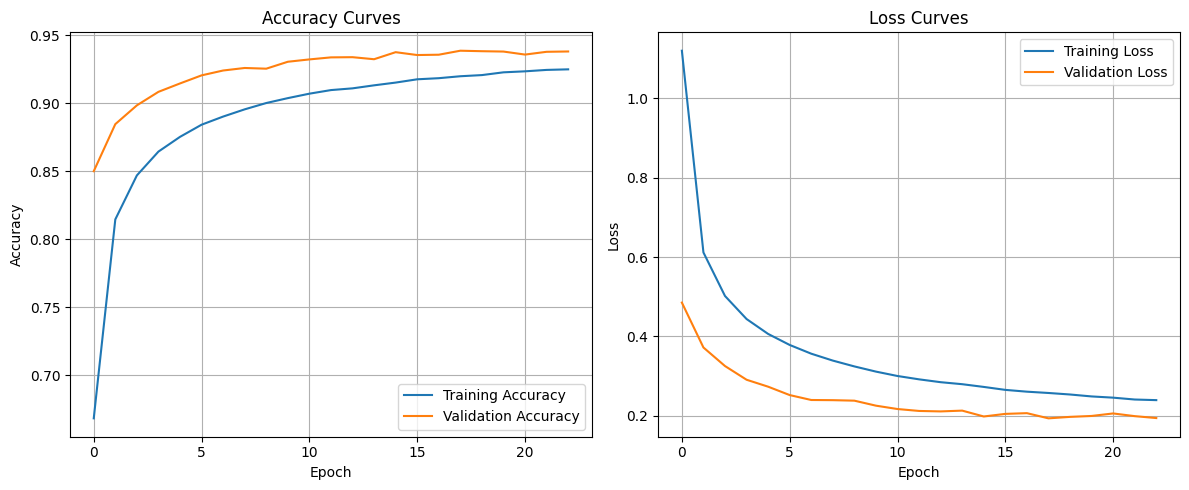

In [17]:
# plots accruacy and  losss
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curves')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curves')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [18]:
best_val_acc = history.history['val_accuracy'][best_epoch]
best_train_acc = history.history['accuracy'][best_epoch]

print(f"Best Validation Accuracy: {best_val_acc:.4f}")
print(f"Training Accuracy at Best Epoch: {best_train_acc:.4f}")


NameError: name 'best_epoch' is not defined